In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
calcium_traces = pd.read_csv('calcium_traces.csv', header =None)
print(calcium_traces.shape)
calcium_traces.head()
data = calcium_traces.to_numpy()

(15300, 1744)


In [4]:
fish_1 = data[:1500,:]
fish_1.shape

(1500, 1744)

#### Correlation matrix of fish_1 data

array([[ 1.        ,  0.53599628,  0.70307707, ...,  0.34085813,
         0.11165106, -0.09373571],
       [ 0.53599628,  1.        ,  0.13059196, ...,  0.17518639,
         0.04988142, -0.08554068],
       [ 0.70307707,  0.13059196,  1.        , ...,  0.21515306,
         0.01918656, -0.051777  ],
       ...,
       [ 0.34085813,  0.17518639,  0.21515306, ...,  1.        ,
         0.04701977, -0.06206201],
       [ 0.11165106,  0.04988142,  0.01918656, ...,  0.04701977,
         1.        , -0.02810111],
       [-0.09373571, -0.08554068, -0.051777  , ..., -0.06206201,
        -0.02810111,  1.        ]])

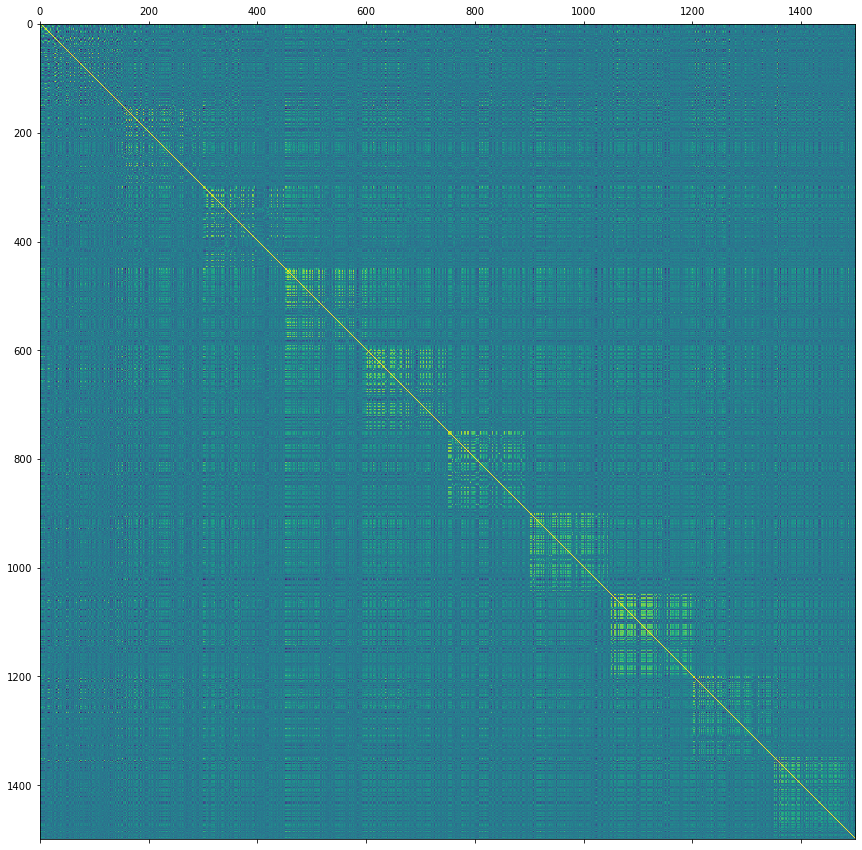

In [5]:
corr_matrix = np.corrcoef(fish_1)
fig, ax = plt.subplots(figsize = (15,15))
ax.matshow(corr_matrix)
corr_matrix

#### Correlation coef of any two neurons (neurons on the row of fish_1, time of activities on the columns)

In [6]:
def cross_corr(data_1, data_2):
    npts = data_1.shape[0]
    lags = np.arange(-npts+1, npts)
    cross_corr = np.correlate(data_1 - data_1.mean(), data_2 - data_2.mean(), mode='same')
    corr_coef = cross_corr/(npts*data_1.std()*data_2.std())
    max_lag = lags[np.argmax(corr_coef)]
    
    return  corr_coef

In [7]:
max_correlations = np.zeros((150, 150))

for n in range(150):  # fixed neurons
  for i in range(150):  # over neurons being compared to
    ccor = cross_corr(fish_1[n, :], fish_1[i, :])
    max_ccor = np.max(ccor)
    max_correlations[n, i] = max_ccor 
print(max_correlations)

[[1.         0.55962183 0.76655693 ... 0.09296479 0.10942303 0.36018496]
 [0.55962183 1.         0.46889172 ... 0.09849547 0.24666269 0.24549949]
 [0.76655693 0.46889172 1.         ... 0.05261085 0.15606818 0.25885779]
 ...
 [0.09296479 0.09849547 0.05261085 ... 1.         0.14043114 0.07592592]
 [0.10942303 0.24666269 0.15606818 ... 0.14043114 1.         0.12007992]
 [0.36018496 0.24549949 0.25885779 ... 0.07592592 0.12007992 1.        ]]


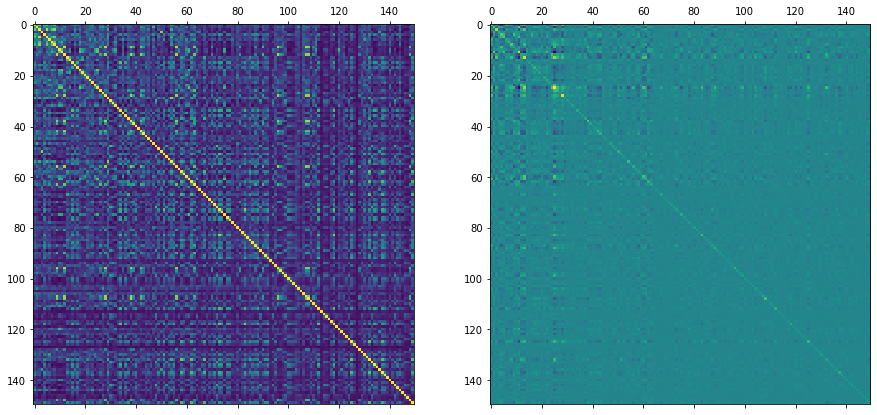

In [8]:
fig, ax = plt.subplots(1,2, figsize = (15,15))
ax[0].matshow(max_correlations)
i_max_correlations  = np.linalg.pinv(max_correlations)
ax[1].matshow(i_max_correlations)

In [9]:
from mlxtend.evaluate import permutation_test

In [10]:
max_correlations = np.zeros((150, 150))
p_values = np.zeros((150,150))
for n in range(150):  # fixed neurons
  for i in range(150):  # over neurons being compared to
    ccor = cross_corr(fish_1[n, :], fish_1[i, :])
    p_values[i,n] = permutation_test(fish_1[n, :], fish_1[i, :],
                           method='approximate',
                           num_rounds=500,
                           seed=10)
    max_ccor = np.max(ccor)
    max_correlations[n, i] = max_ccor 
print(max_correlations)

[[1.         0.55962183 0.76655693 ... 0.09296479 0.10942303 0.36018496]
 [0.55962183 1.         0.46889172 ... 0.09849547 0.24666269 0.24549949]
 [0.76655693 0.46889172 1.         ... 0.05261085 0.15606818 0.25885779]
 ...
 [0.09296479 0.09849547 0.05261085 ... 1.         0.14043114 0.07592592]
 [0.10942303 0.24666269 0.15606818 ... 0.14043114 1.         0.12007992]
 [0.36018496 0.24549949 0.25885779 ... 0.07592592 0.12007992 1.        ]]


In [11]:
p_values

array([[1.        , 0.00199601, 0.76047904, ..., 0.00199601, 0.00199601,
        0.00199601],
       [0.00199601, 1.        , 0.00199601, ..., 0.00199601, 0.00199601,
        0.00199601],
       [0.750499  , 0.00199601, 1.        , ..., 0.00199601, 0.00199601,
        0.00199601],
       ...,
       [0.00199601, 0.00199601, 0.00199601, ..., 1.        , 0.00199601,
        0.00199601],
       [0.00199601, 0.00199601, 0.00199601, ..., 0.00199601, 1.        ,
        0.00199601],
       [0.00199601, 0.00199601, 0.00199601, ..., 0.00199601, 0.00199601,
        1.        ]])

In [12]:
t = np.transpose(np.where(p_values>=0.05))
print(t)

[[  0   0]
 [  0   2]
 [  0  28]
 ...
 [149 107]
 [149 144]
 [149 149]]


C:\ProgramData\Miniconda2\envs\bright\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

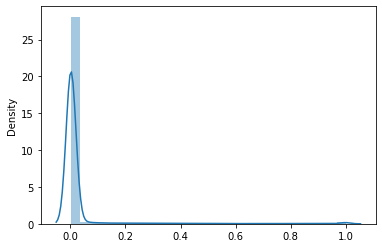

In [23]:
import seaborn as sns
sns.distplot(p_values, kde=True, bins=30)


In [18]:
sns.rugplot((p_values))

ValueError: If using all scalar values, you must pass an index